# Photometry + Spectra

In this notebook I will examine the relationship between our photometric study of the SMC Wing and a corresponding spectroscopic study (Ramachandran et. al) with a similar stellar sample.

In [129]:
# Standard imports

import numpy as np
import matplotlib.pyplot as plt

## Field star photometry without applying any color / (NUV)o thresholds to data

In [130]:
# Original files
SMC_daofind_braun_id_coords_color_nuv = np.genfromtxt('SMC_daofind_braun_id_coords_color_nuv')

# Uncorrected variables
id_number_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,0]
ra_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,1]
dec_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,2]
nuv_v_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,3]
nuv_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,4]

# Corrected variables (including absolute mag correction and extinction correction)
id_number_corr = id_number_nocorr
ra_corr = ra_nocorr
dec_corr = dec_nocorr
nuv_v_corr = nuv_v_nocorr - 0.26
nuv_corr = nuv_nocorr - 18.7 - 0.42
v_corr = nuv_corr - nuv_v_corr # The v extinction correction of - 0.16 is "built in" to the defintion of the nuv_v color.

# Brightness cut
id_number_cut = id_number_corr[nuv_corr <= 0.45]
ra_cut = ra_corr[nuv_corr <= 0.45]
dec_cut = dec_corr[nuv_corr <= 0.45]
nuv_v_cut = nuv_v_corr[nuv_corr <= 0.45]
nuv_cut = nuv_corr[nuv_corr <= 0.45]
v_cut = v_corr[nuv_corr <= 0.45]

# Correction between GALEX catalog vs. daophot
id_number = id_number_cut
ra = ra_cut
dec = dec_cut
nuv_v = nuv_v_cut + 0.6
nuv = nuv_cut + 0.6
v = v_cut

print(len(nuv))

1104


## Defining variables from photometric + spectroscopic stellar match

In [131]:
# Original files
ramachandran_stellar_parameters = np.genfromtxt('../Aug24_photometric_spectroscopic_match_clean')

# Right ascension and declination
ramachandran_ra = ramachandran_stellar_parameters[:,2]
ramachandran_dec = ramachandran_stellar_parameters[:,3]

# Corrections for absolute magnitude, extinction, and catalog discrepancy
# Photometric values from Fulmer et. al., matched with spectra from Ramachandran et. al.
ramachandran_matched_nuv_v = ramachandran_stellar_parameters[:,4] - 0.26 + 0.6
ramachandran_matched_nuv = ramachandran_stellar_parameters[:,5] - 18.7 - 0.42 + 0.6

# Stellar physical parameters
Tstar = ramachandran_stellar_parameters[:,7]
logL = ramachandran_stellar_parameters[:,8]
loggstar = ramachandran_stellar_parameters[:,9]
logM = ramachandran_stellar_parameters[:,10]
EBV = ramachandran_stellar_parameters[:,11]
MV = ramachandran_stellar_parameters[:,12]
Rstar = ramachandran_stellar_parameters[:,13]
vinf = ramachandran_stellar_parameters[:,14]
vsini = ramachandran_stellar_parameters[:,15]
vrad = ramachandran_stellar_parameters[:,16]
Mstar = ramachandran_stellar_parameters[:,17]
logQ0 = ramachandran_stellar_parameters[:,18]
Lmec = ramachandran_stellar_parameters[:,19]

## Defining variables, organized by spectral type

In [132]:
# Original files
ramachandran_O = np.genfromtxt('../Sep5_phot_spec_match_O')
ramachandran_Of = np.genfromtxt('../Sep5_phot_spec_match_Of')
ramachandran_B = np.genfromtxt('../Sep5_phot_spec_match_B')
ramachandran_Be = np.genfromtxt('../Sep5_phot_spec_match_Be')

# NUV-V
nuv_v_O = ramachandran_O[:,4] - 0.26 + 0.6
nuv_v_Of = ramachandran_Of[4] - 0.26 + 0.6
nuv_v_B = ramachandran_B[:,4] - 0.26 + 0.6
nuv_v_Be = ramachandran_Be[:,4] - 0.26 + 0.6

# NUV
nuv_O = ramachandran_O[:,5] - 18.7 - 0.42 + 0.6
nuv_Of = ramachandran_Of[5] - 18.7 - 0.42 + 0.6
nuv_B = ramachandran_B[:,5] - 18.7 - 0.42 + 0.6
nuv_Be = ramachandran_Be[:,5] - 18.7 - 0.42 + 0.6

# Tstar
Tstar_O = ramachandran_O[:,7]
Tstar_Of = ramachandran_Of[7]
Tstar_B = ramachandran_B[:,7]
Tstar_Be = ramachandran_Be[:,7]

# logL
logL_O = ramachandran_O[:,8]
logL_Of = ramachandran_Of[8]
logL_B = ramachandran_B[:,8]
logL_Be = ramachandran_Be[:,8]

## Plotting color-magnitude diagram and Hertzsprung-Russell diagram for OB stars in the SMC Wing

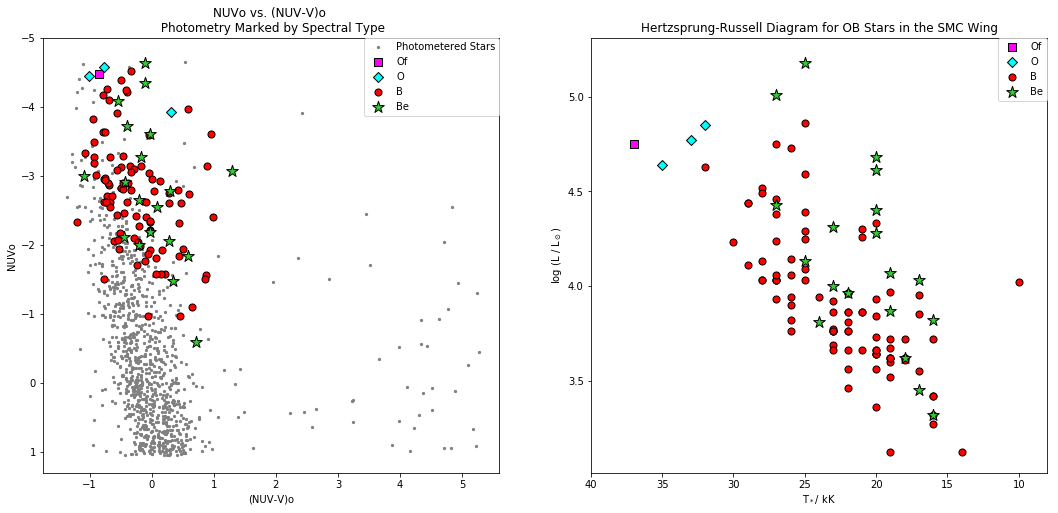

In [139]:
plt.figure(figsize=(18,8))

marker_size = 50
edge_color = 'black'

plt.subplot(122)
plt.scatter(Tstar_Of, logL_Of, facecolor='magenta', edgecolor=edge_color, label="Of", s=marker_size, marker="s")
plt.scatter(Tstar_O, logL_O, facecolor='cyan', edgecolor=edge_color, label="O", s=marker_size, marker="D")
plt.scatter(Tstar_B, logL_B, facecolor='red', edgecolor=edge_color, label="B", s=marker_size, marker="o")
plt.scatter(Tstar_Be, logL_Be, facecolor='limegreen', edgecolor=edge_color, label="Be", s=150, marker="*")

plt.xlabel('T$_*$/ kK')
plt.ylabel('log (L / L$_\odot$)')
plt.title('Hertzsprung-Russell Diagram for OB Stars in the SMC Wing')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., prop={'size':10})
plt.xlim(40, 8)

plt.subplot(121)
plt.scatter(nuv_v, nuv, color='grey', label="Photometered Stars", s=5, marker="o")
# plt.scatter(ramachandran_matched_nuv_v, ramachandran_matched_nuv, color='grey', label="Observed Data", s=5, marker="o")
plt.scatter(nuv_v_Of, nuv_Of, facecolor='magenta', edgecolor=edge_color, label="Of", s=marker_size, marker="s")
plt.scatter(nuv_v_O, nuv_O, facecolor='cyan', edgecolor=edge_color, label="O", s=marker_size, marker="D")
plt.scatter(nuv_v_B, nuv_B, facecolor='red', edgecolor=edge_color, label="B", s=marker_size, marker="o")
plt.scatter(nuv_v_Be, nuv_Be, facecolor='limegreen', edgecolor=edge_color, label="Be", s=150, marker="*")

plt.xlabel('(NUV-V)o')
plt.ylabel('NUVo')
plt.title('NUVo vs. (NUV-V)o \n Photometry Marked by Spectral Type')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., prop={'size':10})
plt.ylim(1.3,-5.0)
plt.xlim(-1.75, 5.6)

plt.show()